# Data Science Salaries Analysis
---

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv
salaries_df = pd.read_csv('../Resources/Data_Science_Salaries_Clean.csv')

# Preview dataframe
salaries_df.head(10)

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
5,5,Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
6,6,Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
7,7,Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
8,8,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
9,9,Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


#### Data Set: In our cleaned data set, we decided to narrow the data down to only include the top 5 most common job titles. The relationships between job title and salary, country, experience, and country size are expolored further below.

## Question 1: What are the differences in salaries between job titles under the data science umbrella?

In [3]:
# List of job titles
salaries_df.value_counts("Job Title")

Job Title
Data Engineer                702
Data Scientist               635
Data Analyst                 459
Machine Learning Engineer    300
Analytics Engineer           132
dtype: int64

In [4]:
# Count of job titles
unique_job_title_count = len(salaries_df["Job Title"].unique())
unique_job_title_count

5

In [5]:
# List of countries
countries = salaries_df["Company Location"].unique()
countries

array(['United States', 'United Kingdom', 'Germany', 'Sweden', 'Spain',
       'Estonia', 'Philippines', 'Canada', 'Australia', 'Andorra',
       'France', 'Netherlands', 'Ecuador', 'Portugal', 'Colombia',
       'Norway', 'Argentina', 'India', 'Nigeria', 'Hong Kong',
       'Switzerland', 'Central African Republic', 'Ireland', 'Slovenia',
       'Mexico', 'Croatia', 'Brazil', 'Armenia', 'Latvia', 'Romania',
       'Thailand', 'Lithuania', 'Iran, Islamic Republic of', 'Hungary',
       'Puerto Rico', 'Finland', 'Greece', 'Belgium', 'Indonesia',
       'Turkey', 'Singapore', 'Italy', 'United Arab Emirates', 'Malaysia',
       'Poland', 'Algeria', 'Austria', 'Chile', 'Japan', 'Luxembourg',
       'Israel', 'Malta'], dtype=object)

In [6]:
# Empty list to hold countries for comparison
countries_to_compare = []

# Loop through all countries 
for country in countries:
    
    # Get the unique job titles for each country
    country_job_titles = salaries_df[salaries_df["Company Location"] == country]["Job Title"].unique()
    
    # Get the number of job titles for each country
    count = len(country_job_titles)
    
    # If the country has all 5 job titles...
    if count == unique_job_title_count:
        # Add the country to the list to compare
        countries_to_compare.append(country)

print(countries_to_compare)

['United States', 'United Kingdom', 'Canada']


In [7]:
# Filter base data frame for only countries in our list to compare
filtered_countries_df = salaries_df[salaries_df['Company Location'].isin(countries_to_compare)]

# Number of records for each country
filtered_countries_df.value_counts("Company Location")

Company Location
United States     1717
United Kingdom     187
Canada              65
dtype: int64

In [8]:
# Group the filtered dataframe by country and job type to get the median salary
grouped_by_country = filtered_countries_df.groupby(["Company Location", "Job Title"])
median_by_country = grouped_by_country["Salary in USD"].median()
median_by_country

Company Location  Job Title                
Canada            Analytics Engineer           112000.0
                  Data Analyst                  92500.0
                  Data Engineer                141200.0
                  Data Scientist               143100.0
                  Machine Learning Engineer    128050.0
United Kingdom    Analytics Engineer           115050.0
                  Data Analyst                  81800.0
                  Data Engineer                 86193.0
                  Data Scientist               102200.0
                  Machine Learning Engineer    103577.5
United States     Analytics Engineer           152500.0
                  Data Analyst                 112900.0
                  Data Engineer                151625.0
                  Data Scientist               154000.0
                  Machine Learning Engineer    180000.0
Name: Salary in USD, dtype: float64

In [9]:
# Set function to hold a list of median salaries for each country to put into summary dataframe
def country_total (country, df=median_by_country):
    totals = []
    for i in range(5):
        totals.append(df[country][i])
    return totals

# Get median salaries for each country
canada = country_total("Canada")
united_kingdom = country_total("United Kingdom")
united_states = country_total("United States")

# Get new data frame for visualizations
median_by_country_df = pd.DataFrame({"Job Title": ["Analytics Engineer", "Data Analyst",
                                           "Data Engineer", "Data Scientist", 
                                           "Machine Learning Engineer"],
                            "Canada": canada,
                            "United Kingdom": united_kingdom,
                            "United States": united_states}).set_index("Job Title")

# Show data frame
median_by_country_df

,Canada,United Kingdom,United States
Job Title,,,
Analytics Engineer,112000.0,115050.0,152500.0
Data Analyst,92500.0,81800.0,112900.0
Data Engineer,141200.0,86193.0,151625.0
Data Scientist,143100.0,102200.0,154000.0
Machine Learning Engineer,128050.0,103577.5,180000.0


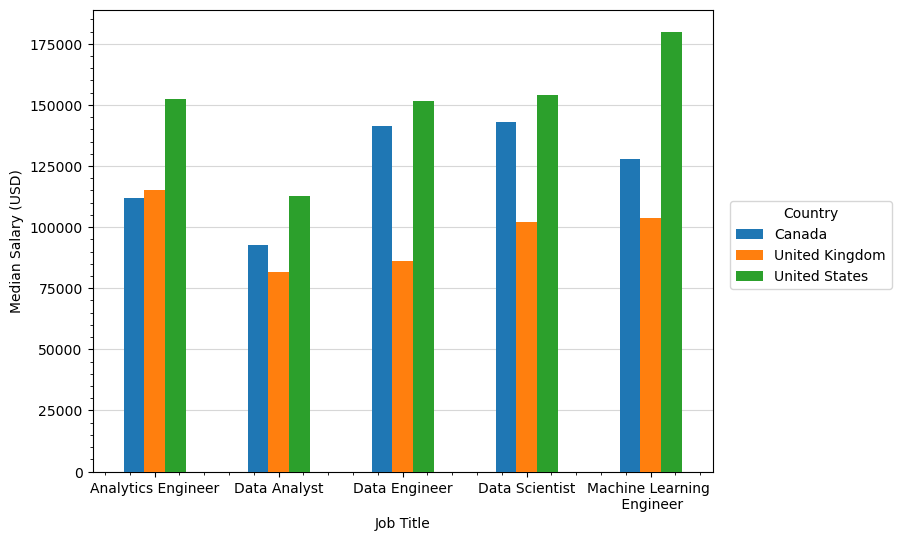

In [10]:
# Plot data
median_by_country_df.plot(kind='bar', figsize=(8,6), zorder=3)
plt.xticks(rotation=0, ticks=[0, 1, 2, 3, 4],labels=["Analytics Engineer", "Data Analyst", 
                                                     "Data Engineer", "Data Scientist", 
                                                     "Machine Learning \n Engineer"])
plt.grid(axis="y", alpha=0.5, zorder=0)
plt.minorticks_on()
plt.ylabel("Median Salary (USD)")
plt.legend(fontsize="medium", title="Country", bbox_to_anchor=(1.3,0.6))
plt.show()

#### Analysis: Before digging into analysis based on company size and future salary predictions, we wanted to further narrow down our data set so that we could display only countries that included all 5 top job titles. These countries were Canada, the United Kingdom, and the United States. Overall, we can see between these three countries that median salaries were highest in the United States and lowest in the United Kingdom.

## Question 2: What is the wage gap between experience/expertise levels?

In [11]:
experience_salary_stats_df = salaries_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
experience_salary_stats_df = experience_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
# experience_salary_stats_df = experience_salary_stats_df.applymap('${:,.2f}'.format)
experience_salary_df = experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
experience_salary_df

Average Salary  Median Salary  \
Job Title                 Experience Level                                  
Analytics Engineer        Entry              101333.333333        90000.0   
                          Mid                129486.047619       112400.0   
                          Senior             159379.760000       152250.0   
                          Executive          175125.000000       166000.0   
Data Analyst              Entry               64327.754386        57920.0   
                          Mid                 99194.704000        93000.0   
                          Senior             123588.472527       119610.0   
                          Executive          113750.000000       120000.0   
Data Engineer             Entry               75370.023256        65000.0   
                          Mid                105866.783133        95000.0   
                          Senior             155895.868182       152437.5   
                          Executive          194317.000000       200000.0   
Data Scientist            Entry               75021.366667        74141.0   
                          Mid                 96619.082278        90367.0   
                          Senior             167714.711055       164500.0   
                          Executive          188429.578947       185000.0   
Machine Learning Engineer Entry               98389.350000        92500.0   
                          Mid                131848.552239       126277.0   
                          Senior             184850.769953       182200.0   

                                            Maximum Salary  Minimum Salary  
Job Title                 Experience Level                                  
Analytics Engineer        Entry                     130000           84000  
                          Mid                       430640           48000  
                          Senior                    289800           48000  
                          Executive                 221000          135000  
Data Analyst              Entry                     150000           15000  
                          Mid                       430967           15680  
                          Senior                    385000           15809  
                          Executive                 160000           55000  
Data Engineer             Entry                     160000           17025  
                          Mid                       260000           20000  
                          Senior                    331640           25000  
                          Executive                 333500           71908  
Data Scientist            Entry                     190000           16000  
                          Mid                       230000           16904  
                          Senior                    412000           20171  
                          Executive                 300000           78000  
Machine Learning Engineer Entry                     250000           20000  
                          Mid                       300000           20984  
                          Senior                    392000           24342

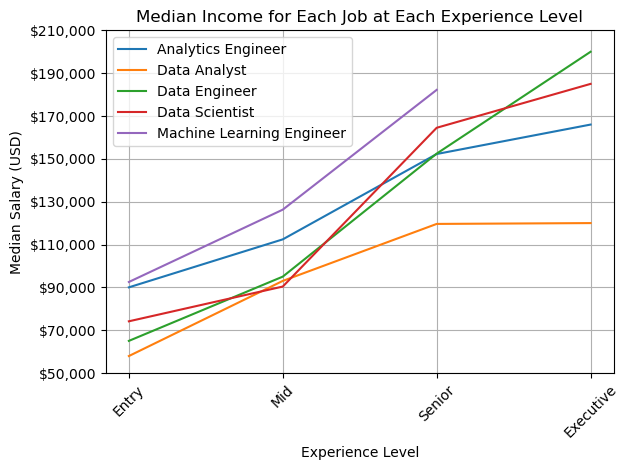

In [12]:
# Create a line graph for each job title
for job_title in experience_salary_df.index.get_level_values("Job Title").unique():
    job_data = experience_salary_df.loc[job_title, "Median Salary"]
    plt.plot(job_data.index, job_data, label=job_title)

# Add labels and legend
plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.title('Median Income for Each Job at Each Experience Level')
plt.xticks(rotation=45)
plt.legend()

# Customize the y-axis ticks to start at $50,000 and go up by $20,000
plt.yticks(range(50000, int(experience_salary_df['Median Salary'].max()) + 20000, 20000))

# Define a custom formatter to display dollar values as tick labels
def dollar_format(x, pos):
    return "${:,.0f}".format(x)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Create data frames for small companies

# Small companies
small_data_df = salaries_df[salaries_df['Company Size'] == 'Small']

# Select only the desired columns
small_data_df = small_data_df[['Job Title', 'Experience Level', 'Salary in USD']]

# Medium companies
med_data_df = salaries_df[salaries_df['Company Size'] == 'Medium']

# Select only the desired columns
med_data_df = med_data_df[['Job Title', 'Experience Level', 'Salary in USD']]

# Large companies
large_data_df = salaries_df[salaries_df['Company Size'] == 'Large']

# Select only the desired columns
large_data_df = large_data_df[['Job Title', 'Experience Level', 'Salary in USD']]

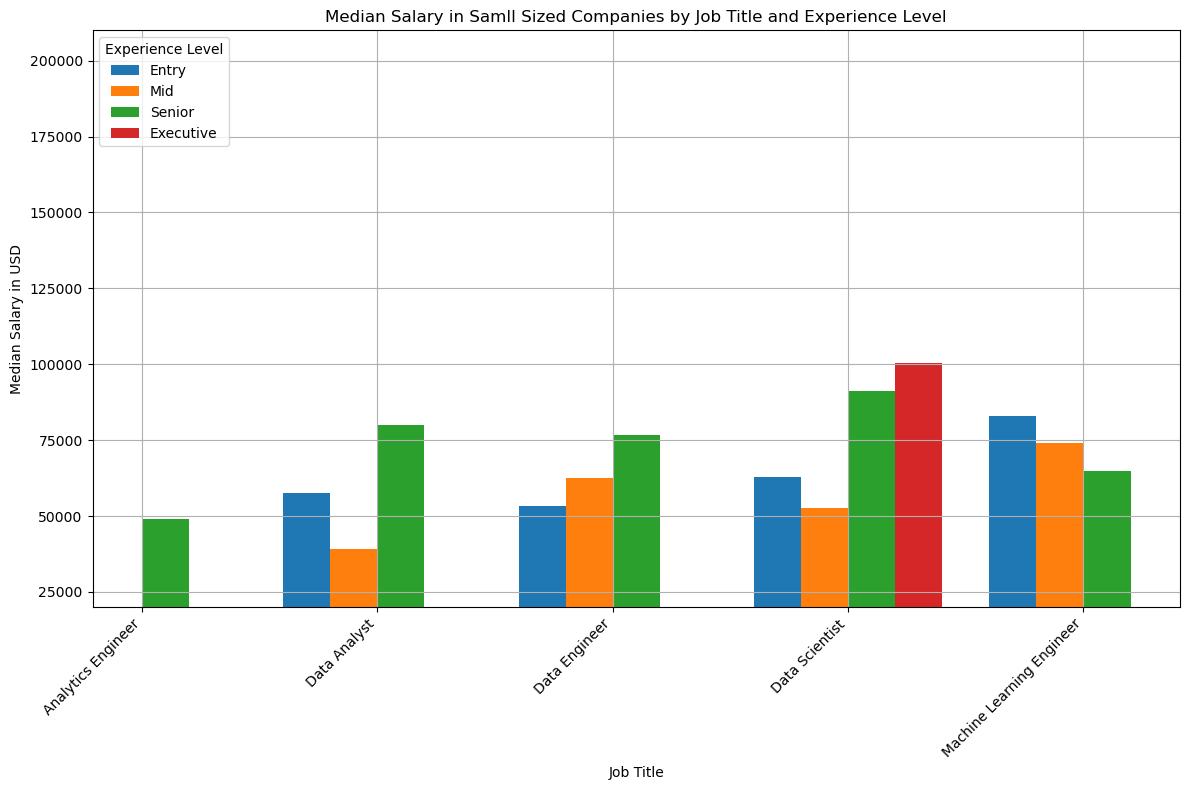

In [15]:
# Create visualizations for small company data

# Define the custom order of Experience Level categories
experience_levels_order = ["Entry", "Mid", "Senior", "Executive"]

# Group the DataFrame by "Job Title" and "Experience Level" and calculate the median salary
grouped_by_size = small_data_df.groupby(["Job Title", "Experience Level"])
median_by_size = grouped_by_size["Salary in USD"].median().reset_index()

# Convert "Experience Level" to a Categorical data type with the custom order
median_by_size["Experience Level"] = pd.Categorical(median_by_size["Experience Level"], categories=experience_levels_order, ordered=True)

# Create a pivot table to handle missing combinations of Job Title and Experience Level
pivot_table = pd.pivot_table(median_by_size, values='Salary in USD', index='Job Title', columns='Experience Level')

# Set up the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define width for each group of bars
width = 0.2

# Loop through each experience level and plot bars for each job title
for i, exp_level in enumerate(experience_levels_order):
    positions = np.arange(len(pivot_table.index)) + i * width
    salaries = pivot_table[exp_level].values
    ax.bar(positions, salaries, width=width, label=exp_level)

# Set y-axis limits
ax.set_ylim(20000, 210000)

# Set x-axis labels and tick positions
ax.set_xticks(np.arange(len(pivot_table.index)) + (len(experience_levels_order) - 1) * width / 2)
ax.set_xticklabels(pivot_table.index)

ax.set_xlabel("Job Title")
ax.set_ylabel("Median Salary in USD")
ax.set_title("Median Salary in Samll Sized Companies by Job Title and Experience Level")
ax.legend(title="Experience Level", loc="upper left")

plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

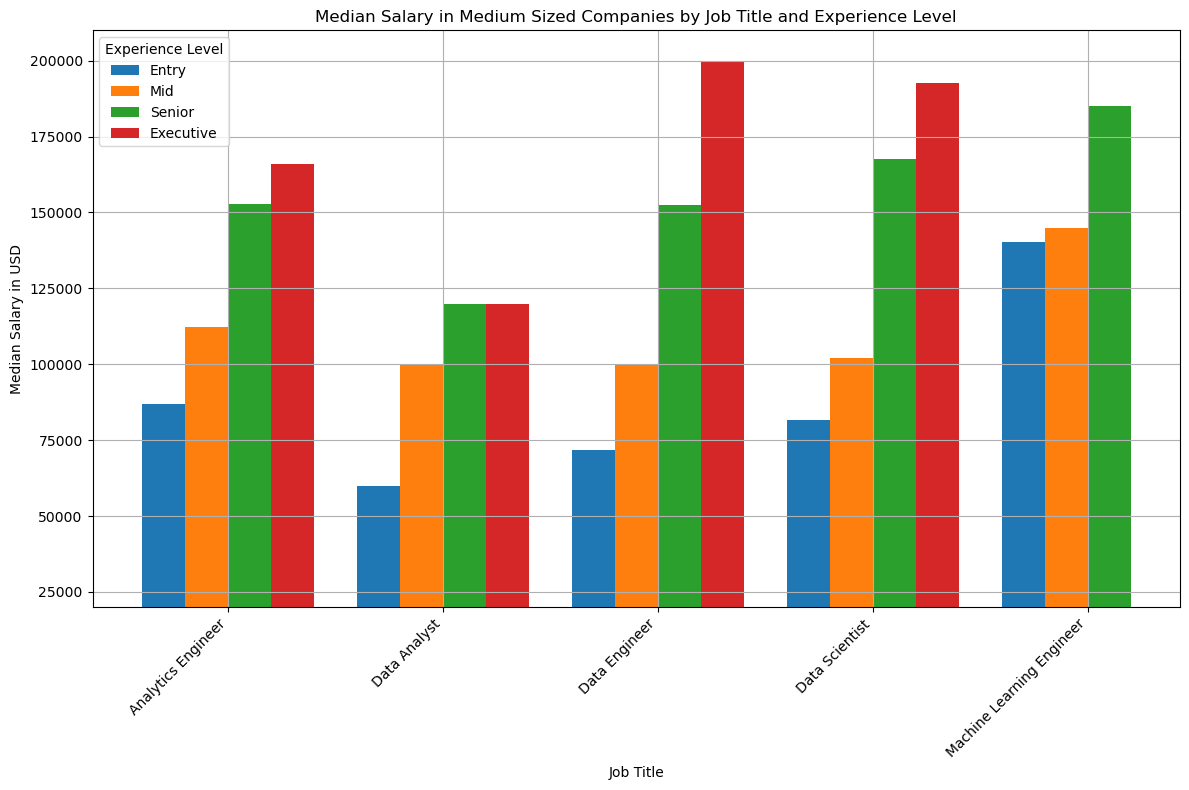

In [16]:
# Create visualizations for medium company data

# Define the custom order of Experience Level categories
experience_levels_order = ["Entry", "Mid", "Senior", "Executive"]

# Group the DataFrame by "Job Title" and "Experience Level" and calculate the median salary
grouped_by_size = med_data_df.groupby(["Job Title", "Experience Level"])
median_by_size = grouped_by_size["Salary in USD"].median().reset_index()

# Convert "Experience Level" to a Categorical data type with the custom order
median_by_size["Experience Level"] = pd.Categorical(median_by_size["Experience Level"], categories=experience_levels_order, ordered=True)

# Create a pivot table to handle missing combinations of Job Title and Experience Level
pivot_table = pd.pivot_table(median_by_size, values='Salary in USD', index='Job Title', columns='Experience Level')

# Set up the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define width for each group of bars
width = 0.2

# Loop through each experience level and plot bars for each job title
for i, exp_level in enumerate(experience_levels_order):
    positions = np.arange(len(pivot_table.index)) + i * width
    salaries = pivot_table[exp_level].values
    ax.bar(positions, salaries, width=width, label=exp_level)

# Set y-axis limits
ax.set_ylim(20000, 210000)

# Set x-axis labels and tick positions
ax.set_xticks(np.arange(len(pivot_table.index)) + (len(experience_levels_order) - 1) * width / 2)
ax.set_xticklabels(pivot_table.index)

ax.set_xlabel("Job Title")
ax.set_ylabel("Median Salary in USD")
ax.set_title("Median Salary in Medium Sized Companies by Job Title and Experience Level")
ax.legend(title="Experience Level", loc="upper left")

plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

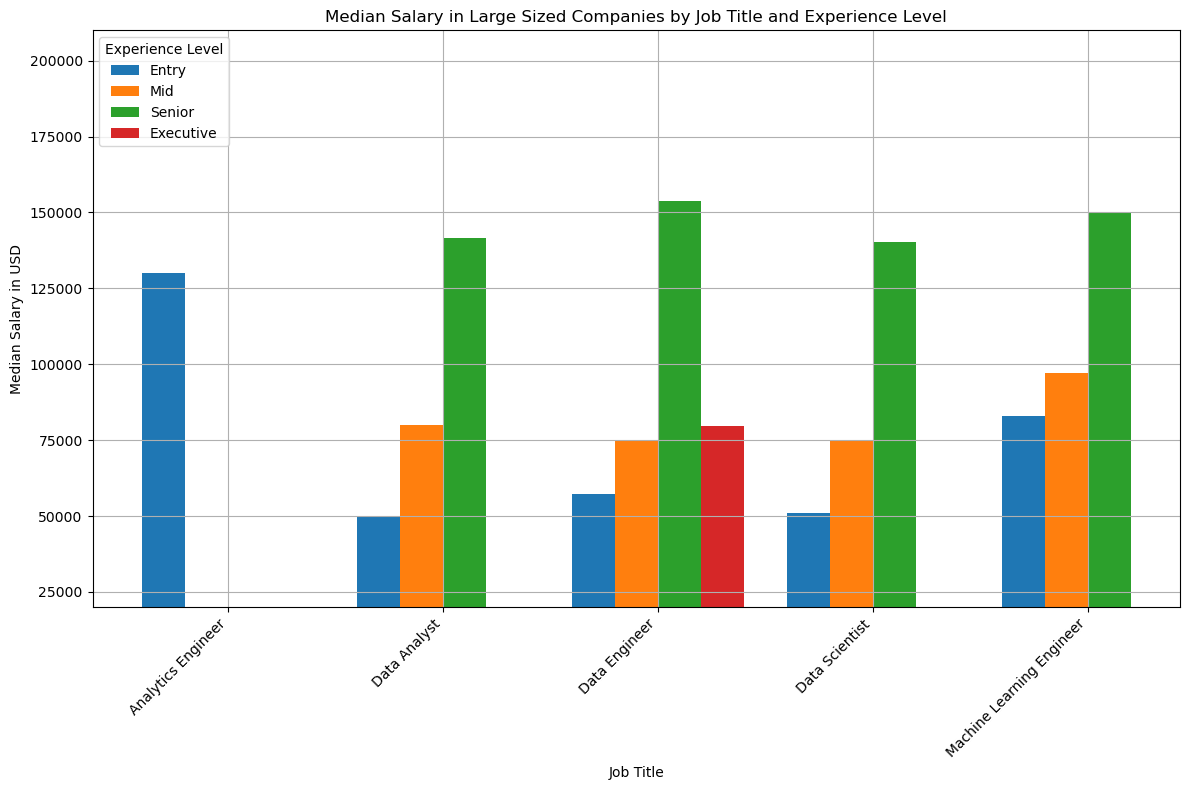

In [17]:
# Define the custom order of Experience Level categories
experience_levels_order = ["Entry", "Mid", "Senior", 'Executive']

# Group the DataFrame by "Job Title" and "Experience Level" and calculate the median salary
grouped_by_size = large_data_df.groupby(["Job Title", "Experience Level"])
median_by_size = grouped_by_size["Salary in USD"].median().reset_index()

# Convert "Experience Level" to a Categorical data type with the custom order
median_by_size["Experience Level"] = pd.Categorical(median_by_size["Experience Level"], categories=experience_levels_order, ordered=True)

# Create a pivot table to handle missing combinations of Job Title and Experience Level
pivot_table = pd.pivot_table(median_by_size, values='Salary in USD', index='Job Title', columns='Experience Level')

# Set up the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define width for each group of bars
width = 0.2

# Loop through each experience level and plot bars for each job title
for i, exp_level in enumerate(experience_levels_order):
    positions = np.arange(len(pivot_table.index)) + i * width
    salaries = pivot_table[exp_level].values
    ax.bar(positions, salaries, width=width, label=exp_level)

# Set y-axis limits
ax.set_ylim(20000, 210000)

# Set x-axis labels and tick positions
ax.set_xticks(np.arange(len(pivot_table.index)) + (len(experience_levels_order) - 1) * width / 2)
ax.set_xticklabels(pivot_table.index)

ax.set_xlabel("Job Title")
ax.set_ylabel("Median Salary in USD")
ax.set_title("Median Salary in Large Sized Companies by Job Title and Experience Level")
ax.legend(title="Experience Level", loc="upper left")

plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analysis: We can see that for each of the job titles included in our selected data, salaries increase with experience.

## Question 3: Does company size have an impact on salary?

In [18]:
expertise_level_count= salaries_df.groupby("Expertise Level")
expertise_level_count["Expertise Level"].count().sort_values(ascending=False)

Expertise Level
Expert          1424
Intermediate     537
Junior           183
Director          84
Name: Expertise Level, dtype: int64

In [19]:
expertise_level_dir = salaries_df.loc[salaries_df["Expertise Level"] == "Director" , :]
expertise_level_dir.head(10)

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
38,59,Data Engineer,Full-Time,Executive,Director,205785,United States Dollar,United Kingdom,205785,United Kingdom,Medium,2023
39,60,Data Engineer,Full-Time,Executive,Director,123471,United States Dollar,United Kingdom,123471,United Kingdom,Medium,2023
91,131,Data Engineer,Full-Time,Executive,Director,130002,United States Dollar,United States,130002,United States,Medium,2023
92,132,Data Engineer,Full-Time,Executive,Director,71908,United States Dollar,United States,71908,United States,Medium,2023
113,167,Data Engineer,Full-Time,Executive,Director,174500,United States Dollar,United States,174500,United States,Medium,2023
114,168,Data Engineer,Full-Time,Executive,Director,113000,United States Dollar,United States,113000,United States,Medium,2023
131,189,Data Scientist,Full-Time,Executive,Director,299500,United States Dollar,United States,299500,United States,Medium,2023
132,190,Data Scientist,Full-Time,Executive,Director,249600,United States Dollar,United States,249600,United States,Medium,2023
205,283,Data Engineer,Full-Time,Executive,Director,220000,United States Dollar,United States,220000,United States,Medium,2023
206,284,Data Engineer,Full-Time,Executive,Director,150000,United States Dollar,United States,150000,United States,Medium,2023


In [20]:
expertise_level_jr = salaries_df.loc[salaries_df["Expertise Level"] == "Junior" , :]
expertise_level_jr.head(10)

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
173,241,Data Analyst,Full-Time,Entry,Junior,90000,United States Dollar,United States,90000,United States,Medium,2023
174,242,Data Analyst,Full-Time,Entry,Junior,60000,United States Dollar,United States,60000,United States,Medium,2023
179,249,Data Analyst,Full-Time,Entry,Junior,40000,British Pound Sterling,United Kingdom,49216,United Kingdom,Medium,2023
180,250,Data Analyst,Full-Time,Entry,Junior,34000,British Pound Sterling,United Kingdom,41833,United Kingdom,Medium,2023
231,319,Data Engineer,Full-Time,Entry,Junior,80000,United States Dollar,United States,80000,United States,Medium,2023
232,320,Data Engineer,Full-Time,Entry,Junior,52500,United States Dollar,United States,52500,United States,Medium,2023
253,348,Data Analyst,Full-Time,Entry,Junior,55000,Canadian Dollar,Canada,40747,Canada,Large,2023
391,555,Data Analyst,Full-Time,Entry,Junior,125000,United States Dollar,United States,125000,United States,Medium,2023
392,556,Data Analyst,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Medium,2023
401,566,Data Scientist,Full-Time,Entry,Junior,30000,Euro,Netherlands,32390,Netherlands,Large,2023


In [21]:
title_data_analyst = salaries_df.loc[salaries_df["Job Title"] == "Data Analyst" , :]
title_data_analyst.head(10)

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
20,22,Data Analyst,Full-Time,Senior,Expert,204500,United States Dollar,United States,204500,United States,Medium,2023
21,23,Data Analyst,Full-Time,Senior,Expert,138900,United States Dollar,United States,138900,United States,Medium,2023
36,53,Data Analyst,Full-Time,Senior,Expert,169000,United States Dollar,United States,169000,United States,Medium,2023
37,54,Data Analyst,Full-Time,Senior,Expert,110600,United States Dollar,United States,110600,United States,Medium,2023
47,75,Data Analyst,Full-Time,Senior,Expert,49200,Euro,Estonia,53120,Estonia,Medium,2023
48,76,Data Analyst,Full-Time,Senior,Expert,36000,Euro,Estonia,38868,Estonia,Medium,2023
63,96,Data Analyst,Full-Time,Senior,Expert,120350,United States Dollar,United States,120350,United States,Medium,2023
64,97,Data Analyst,Full-Time,Senior,Expert,74400,United States Dollar,United States,74400,United States,Medium,2023
87,127,Data Analyst,Full-Time,Senior,Expert,168000,United States Dollar,United States,168000,United States,Large,2023
88,128,Data Analyst,Full-Time,Senior,Expert,78400,United States Dollar,United States,78400,United States,Large,2023


In [22]:
job_title_clean = salaries_df.loc[salaries_df["Job Title"].isin(["Data Engineer",
                                            "Data Scientist", "Data Analyst", "Machine Learning Engineer",
                                            "Analytics Engineer"])]
job_title_clean

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
2224,3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
2225,3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
2226,3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


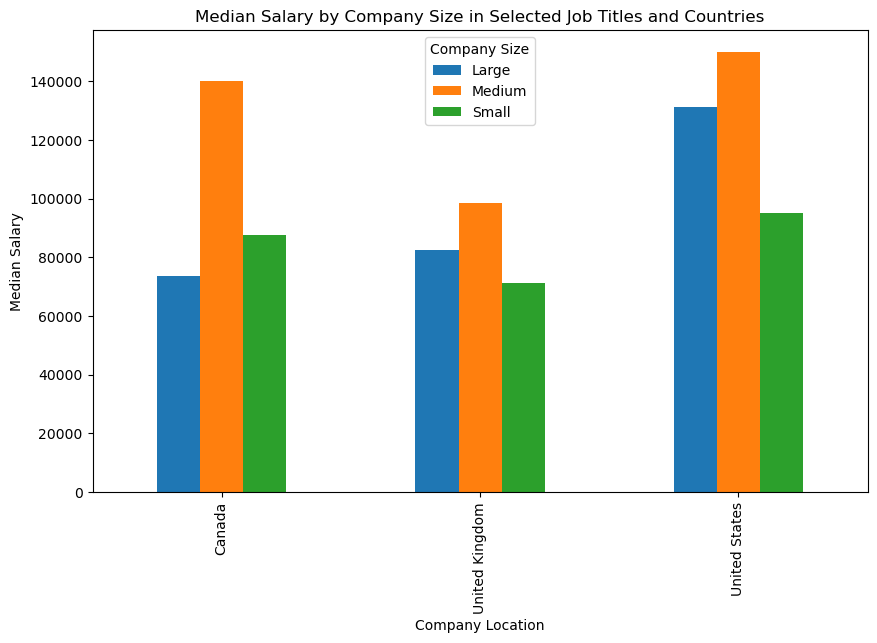

In [23]:
# List of job titles to include
specific_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# List of countries to include
countries_to_include = ['United States', 'Canada', 'United Kingdom']

# Filter data to include only specified job titles and countries
selected_data = job_title_clean[
    job_title_clean['Job Title'].isin(specific_job_titles) &
    job_title_clean['Company Location'].isin(countries_to_include)
]

# Calculate median salary by 'company size' and 'Company Location' for the selected job titles and countries
median_salary_by_size_country = selected_data.groupby(['Company Location', 'Company Size'])['Salary in USD'].median().reset_index()

# Pivot the data to have 'Company Size' as columns and 'Company Location' as rows
pivoted_data = median_salary_by_size_country.pivot(index='Company Location', columns='Company Size', values='Salary in USD')

# Plot the grouped bar graph
plt.figure(figsize=(10, 6))
pivoted_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Company Location')
plt.ylabel('Median Salary')
plt.title('Median Salary by Company Size in Selected Job Titles and Countries')

plt.show()

#### Analysis: While it appears that medium size companies have the highest salaries in our selected data, it is not clear that there is any direct relationship between company size and median salary.

## Question 4: Can we predict salary outlooks for the future?

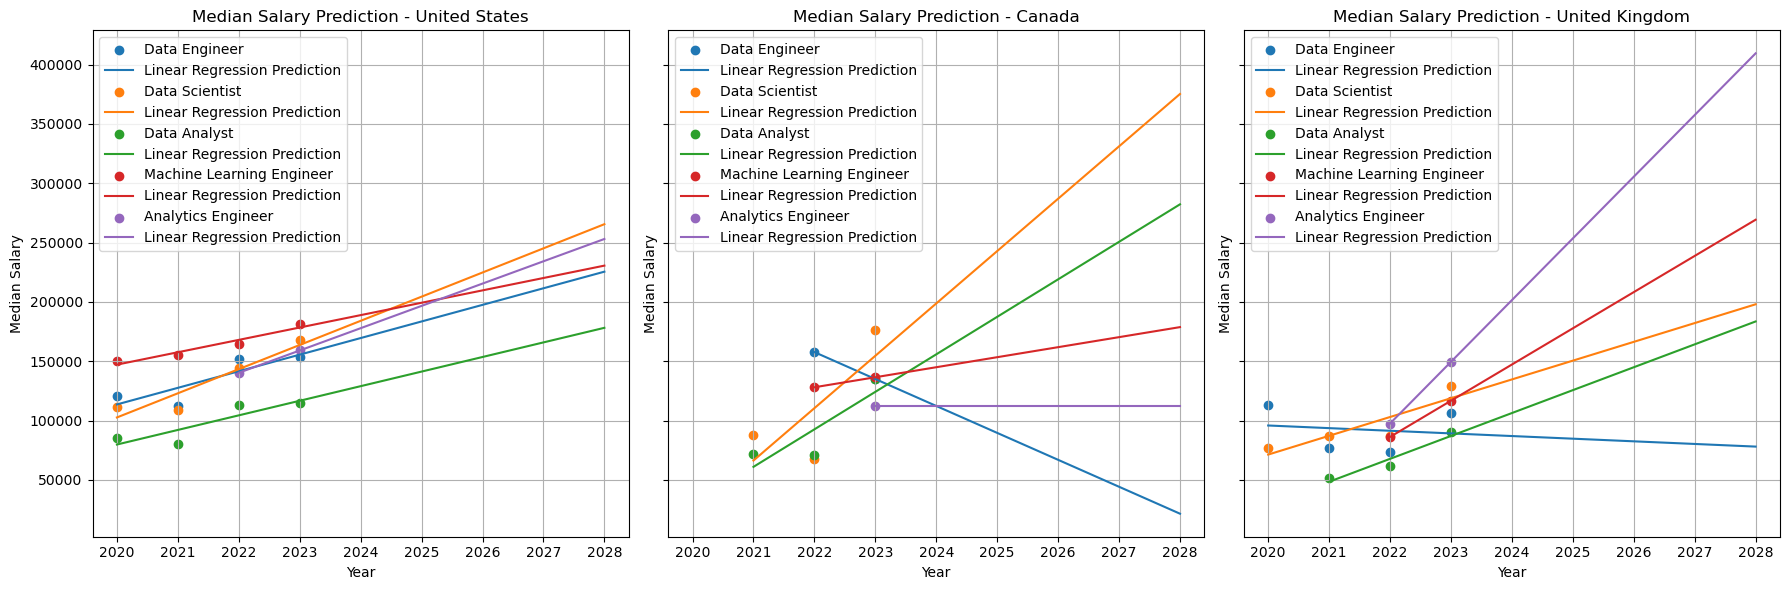

In [24]:
# List of specific job titles to include
specific_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# List of countries to include
countries_to_include = ['United States', 'Canada', 'United Kingdom']

# Filter the data to include only the specified job titles and countries
selected_data = job_title_clean[
    job_title_clean['Job Title'].isin(specific_job_titles) &
    job_title_clean['Company Location'].isin(countries_to_include)
]

# Calculate the median salary by year, company size, Company Location, and job title for the selected data
median_salary_by_year_job_country = selected_data.groupby(['Year', 'Job Title', 'Company Location'])['Salary in USD'].median().reset_index()

# Create three separate subplots, one for each country
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Loop through each country and plot the prediction lines in its subplot
for i, country in enumerate(countries_to_include):
    # Get the specific data for the current country
    country_data = median_salary_by_year_job_country[median_salary_by_year_job_country['Company Location'] == country]

    # Plot the data and prediction line in the subplot
    ax = axes[i]
    for job_title in specific_job_titles:
        # Filter the data for the specific job title and Company Location
        job_country_data = country_data[country_data['Job Title'] == job_title]

        # Extract the features (years) and target (median salary)
        x = job_country_data['Year'].values.reshape(-1, 1)
        y = job_country_data['Salary in USD'].values

        # Create and fit a linear regression model
        regressor = LinearRegression()
        regressor.fit(x, y)

        # Generate predictions for future years
        future_years = range(job_country_data['Year'].min(), job_country_data['Year'].max() + 6)  # Predicting for the next 5 years
        future_x = np.array(future_years).reshape(-1, 1)
        future_predictions = regressor.predict(future_x)

        # Plot the actual data points and the prediction line in the current subplot
        ax.scatter(job_country_data['Year'], job_country_data['Salary in USD'], label=job_title)
        ax.plot(future_years, future_predictions, label="Linear Regression Prediction")

    # Set labels and title for the subplot
    ax.set_xlabel("Year")
    ax.set_ylabel("Median Salary")
    ax.set_title(f"Median Salary Prediction - {country}")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Analysis: We can use linear regression to predict the trend in median salaries over the next 5 years. Overall, the salaries for most job titles are trending upwards.